Importo las librerias necesarias

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

Creo el DataFrame con los datos del nivel del mar en función de los años

In [24]:
df = pd.read_csv(r'C:\Users\Tino\Documents\Documentos\Data\freeCodeCamp Data Analytics with Python\Ex5\epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


Realizo un grafico de dispersion para ver cómo se distribuyen los datos

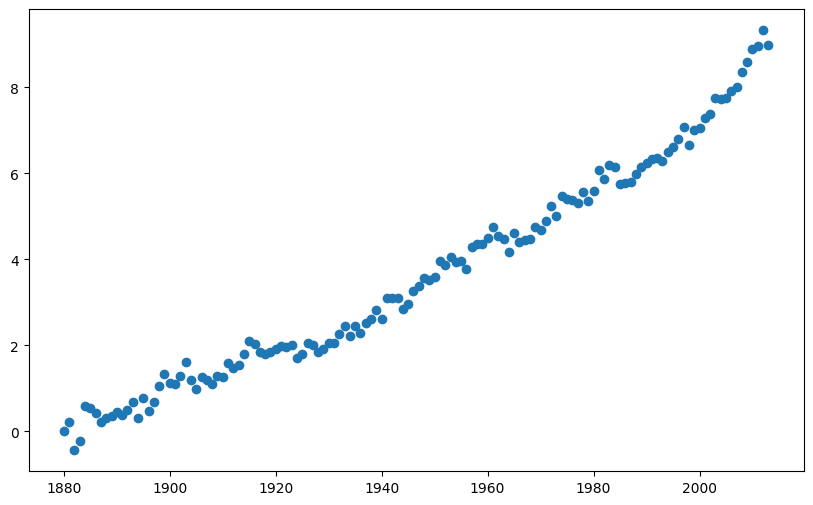

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

Realizo una regresión lineal de los datos en vistas de extrapolar el nivel del mar en años futuros

np.float64(0.984757131182585)

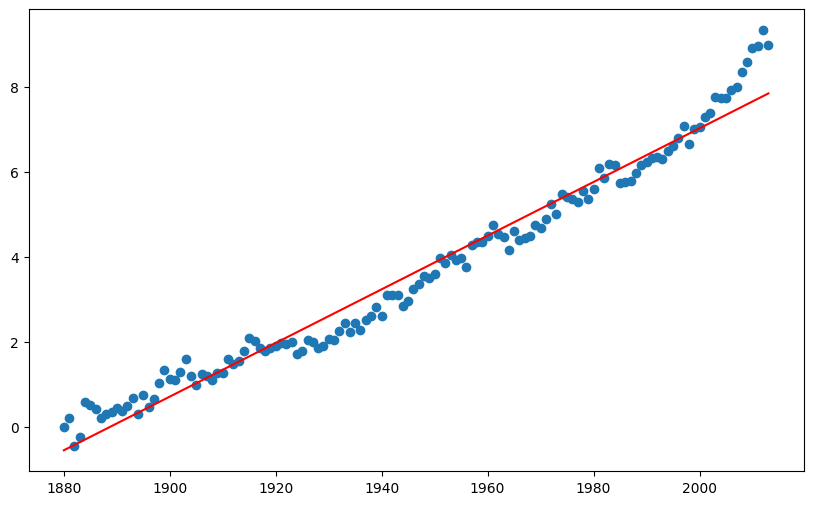

In [26]:
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
regression_line = slope * (df['Year']) + intercept
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.plot(df['Year'], regression_line, color='red')
r_value

Extiendo los datos en X para poder extrapolar el valor del nivel del mar en 2050

In [27]:
x_extended = pd.Series(list(range(df['Year'].min(), 2051)))

Grafico la extesión y calculo el nivel del mar según la regresión en el año 2050

10.175455257136548


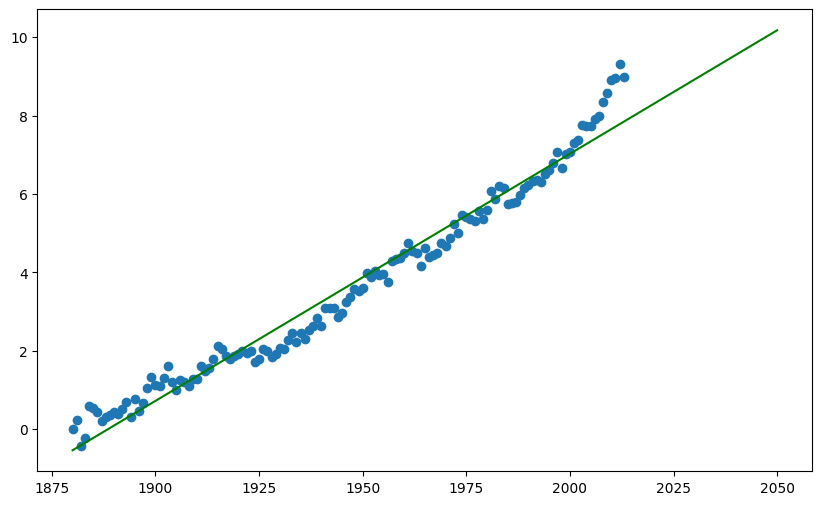

In [31]:
y_pred = slope * x_extended + intercept
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.plot(x_extended, y_pred, color='green', label='Fitted line')
pred_2050 = slope * 2050 + intercept
print(pred_2050)


Dado que aproximadamente en el 2000 el nivel del mar parece estar acelerando su tasa de crecimiento, realizo una regresión lineal utilizando los datos a partir de ese año

15.382443524364874


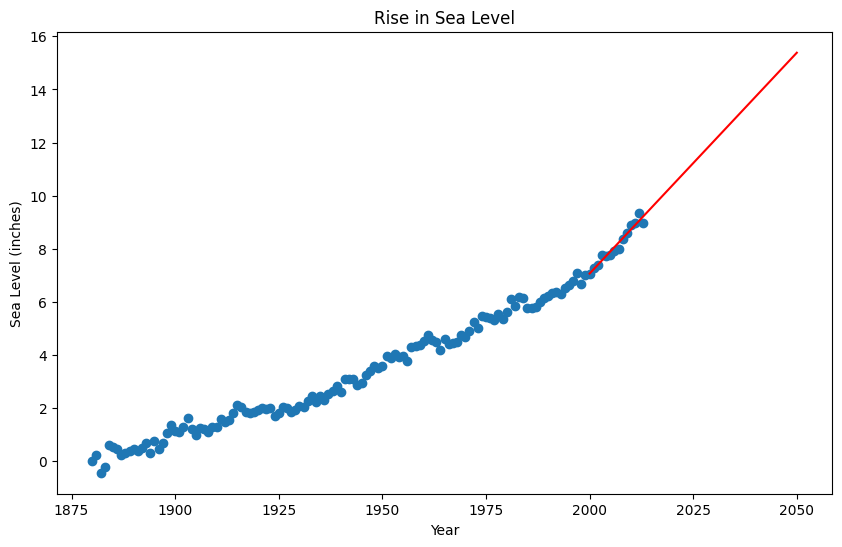

In [34]:
from2000 = df[df['Year']>=2000]
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(from2000['Year'], from2000['CSIRO Adjusted Sea Level'])
x_extended2 = pd.Series(list(range(from2000['Year'].min(), 2051)))
y_pred2 = slope2 * x_extended2 + intercept2
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.plot(x_extended2, y_pred2, color='red', label='Fitted line')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
pred_2050_from2000 = slope2 * 2050 + intercept2
print(pred_2050_from2000)
